# Problem Statement

Write a function that can shift an MNIST image in any direction
(left, right, up, or down) by one pixel. <br>Then, for each image in the
training set, create four shifted copies (one per direction) and add
them to the training set. Finally, train your best model on this
expanded training set and measure its accuracy on the test set.

#### import required packages:

In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from scipy.ndimage import shift
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

warnings.filterwarnings('ignore') # disable warnnings

#### fetch the data:

In [2]:
mnist = fetch_openml("mnist_784", version=1)

In [3]:
X, y = mnist["data"], mnist["target"]
X, y = np.ascontiguousarray(X), np.ascontiguousarray(y)
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

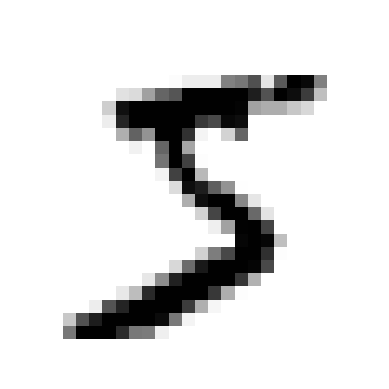

In [4]:
def pimg(img):
    img.shape = (28, 28)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.axis("off")
    plt.show()
    
img_number = X_train[0]
pimg(img_number)

#### Shifted image looks like:

<Figure size 1000x1000 with 0 Axes>

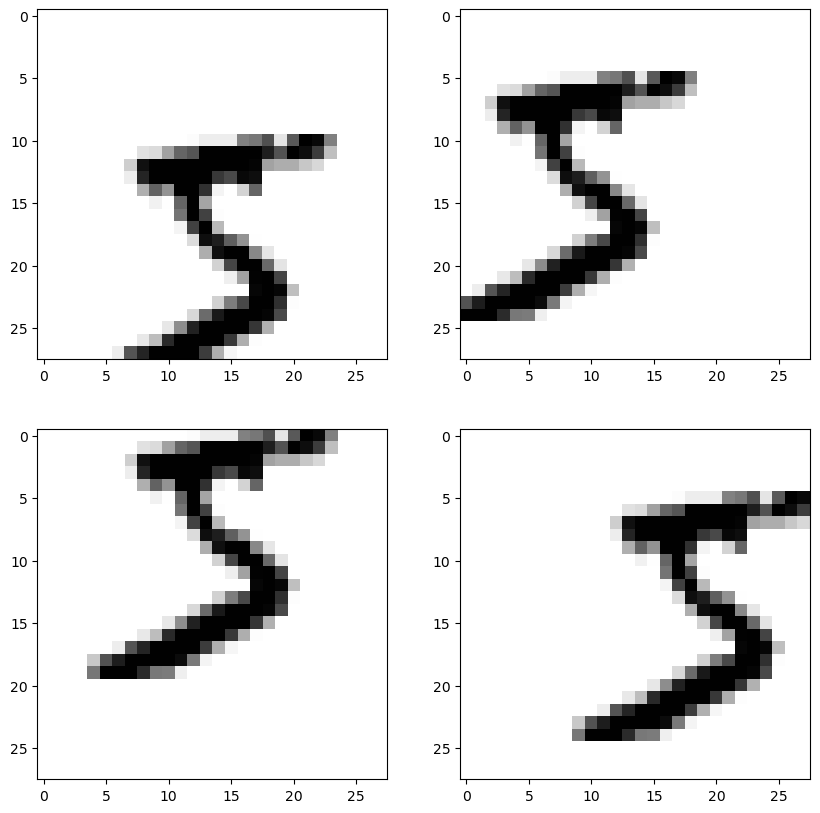

In [5]:
plt.figure(figsize=(10, 10))
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

img_number.shape = (28, 28)

ax1.imshow(shift(img_number, [5, 0]), cmap=plt.cm.binary)
ax2.imshow(shift(img_number, [0, -5]), cmap=plt.cm.binary)
ax3.imshow(shift(img_number, [-5, 0]), cmap=plt.cm.binary)
ax4.imshow(shift(img_number, [0, 5]), cmap=plt.cm.binary)

plt.show()

####  now, starting with data augmentation:

In [6]:
X_train_shifted = np.array([X_train.copy()] * 5)
y_train = np.array([y_train.copy()] * 5)
dirs = [(0, 1), (0, -1), (1, 0), (-1, 0)]

for i, _dir in enumerate(dirs):
    if i == 4:
        break
        
    for j in range(len(X_train_shifted[i])):
        img = X_train[j].reshape(28, 28)
        shifted_img = shift(img, _dir, mode='nearest')
        X_train_shifted[i, j] = shifted_img.flatten()


In [7]:
X_augmented = np.vstack(X_train_shifted)
y_train.shape = (5 * 60000,)
(X_augmented.shape),(y_train.shape)

((300000, 784), (300000,))

#### it's time to train the model on the new dataset:

In [8]:
knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_clf.fit(X_augmented, y_train)
y_pred = knn_clf.predict(X_augmented)

In [9]:
accuracy_score(y_true=y_train, y_pred=y_pred)

0.9948166666666667

#### now, test how it is performs on unseen data:

In [11]:
y_test_pred = knn_clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.9756